# Sigma Parameter Range 

In this file we are going to try to find out why sigma slows down.

In [18]:
from res_experiment import *
import time
from matplotlib import pyplot as plt

In [2]:
# Standard Hyper Parameters
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": .0001,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

# Generate sigma values from a log space
sms = np.logspace(-7,5, 13)



ORBITS_PER = 10
timesteps_correct = []
errors = []
for s in sms:
    start = time.time()
    for i in range(ORBITS_PER):
        err = []
        acc = []
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        rc = ResComp(**params)
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        pred = rc.predict(test_t)
        acc.append(how_long_accurate(u(test_t), pred))
    # Store results
    print(f"Sigma: {s} \t Timesteps Correct: {np.mean(acc)} \t Error: {np.mean(err)} \t Time: {time.time()-start}")
    errors.append(np.mean(err))
    timesteps_correct.append(np.mean(acc))

Sigma: 1e-07 	 Timesteps Correct: 0.0 	 Error: 12.394319737206411 	 Time: 105.00617361068726
Sigma: 1e-06 	 Timesteps Correct: 0.0 	 Error: 11.900644684411853 	 Time: 117.99445080757141
Sigma: 1e-05 	 Timesteps Correct: 0.0 	 Error: 8.799871063989077 	 Time: 106.73357152938843
Sigma: 0.0001 	 Timesteps Correct: 0.0 	 Error: 5.15294593348297 	 Time: 108.32032179832458
Sigma: 0.001 	 Timesteps Correct: 0.0 	 Error: 5.093619951677691 	 Time: 118.88008546829224
Sigma: 0.01 	 Timesteps Correct: 757.0 	 Error: 0.22022466878876273 	 Time: 275.40786695480347
Sigma: 0.1 	 Timesteps Correct: 1180.0 	 Error: 0.05426369777376998 	 Time: 144.53108263015747
Sigma: 1.0 	 Timesteps Correct: 0.0 	 Error: 1.5634686339654489 	 Time: 333.82244873046875
Sigma: 10.0 	 Timesteps Correct: 12.0 	 Error: 3.882653248053003 	 Time: 740.1378247737885


KeyboardInterrupt: 

Find which part takes the time

In [7]:
# Standard Hyper Parameters
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": .0001,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

# Generate sigma values from a log space
sms = np.logspace(-2.5,1, 14)



ORBITS_PER = 1
timesteps_correct = []
errors = []
for s in sms:
    start = time.time()
    print("Sigma:",s)
    for i in range(ORBITS_PER):
        err = []
        acc = []
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        last = time.time()
        first = last
        params["sigma"] = s
        rc = ResComp(**params)
        print("Intialize Res Comp:",time.time()-last)
        last = time.time()
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        print("Train:",time.time()-last)
        last = time.time()
        pred = rc.predict(test_t)
        print("Predict:",time.time()-last)
        last = time.time()
        acc.append(how_long_accurate(u(test_t), pred))
        print("How long Acurate",time.time()-last)
        last = time.time()
        print("Total:",last-first,"\n")
    # Store results
    #print(f"Sigma: {s} \t Timesteps Correct: {np.mean(acc)} \t Error: {np.mean(err)} \t Time: {time.time()-start}")
    errors.append(np.mean(err))
    timesteps_correct.append(np.mean(acc))

Sigma: 0.0031622776601683794
Intialize Res Comp: 2.288882255554199
Train: 3.9573755264282227
Predict: 0.9574391841888428
How long Acurate 0.015958547592163086
Total: 7.22065281867981 

Sigma: 0.0058780160722749115
Intialize Res Comp: 2.2879111766815186
Train: 4.262573719024658
Predict: 0.7100977897644043
How long Acurate 0.01997852325439453
Total: 7.28252387046814 

Sigma: 0.01092600861117378
Intialize Res Comp: 2.283891439437866
Train: 4.404223680496216
Predict: 0.7689728736877441
How long Acurate 0.020913362503051758
Total: 7.478998184204102 

Sigma: 0.020309176209047358
Intialize Res Comp: 2.2230875492095947
Train: 4.459046125411987
Predict: 0.8467328548431396
How long Acurate 0.021941661834716797
Total: 7.552802085876465 

Sigma: 0.03775053205324393
Intialize Res Comp: 2.3956243991851807
Train: 4.973667144775391
Predict: 0.9195418357849121
How long Acurate 0.021940231323242188
Total: 8.310773611068726 

Sigma: 0.07017038286703826
Intialize Res Comp: 2.2589900493621826
Train: 5.1980

Intialization stayed the same as well as how long acurate, so I removed those categories.

In [16]:
# Standard Hyper Parameters
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": .0001,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

# Generate sigma values from a log space
sms = np.logspace(-2.5,1, 14)



ORBITS_PER = 2
timesteps_correct = []
errors = []
for s in sms:
    start = time.time()
    err = []
    acc = []
    train_time = []
    predict_time = []
    for i in range(ORBITS_PER):
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        rc = ResComp(**params)
        last = time.time()
        first = last
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        train_time.append(time.time()-last)
        last = time.time()
        pred = rc.predict(test_t)
        predict_time.append(time.time()-last)
        last = time.time()
        acc.append(how_long_accurate(u(test_t), pred))
    # Store results
    print(f"Sigma: {s} \t Timesteps Correct: {np.mean(acc)} \t Error: {np.mean(err)}"
    f"\nTotal Time: {time.time()-start} \t Total Training Time: {np.sum(train_time)} \t Total Predict Time: {np.sum(predict_time)}\n")
    errors.append(np.mean(err))
    timesteps_correct.append(np.mean(acc))

Sigma: 0.0031622776601683794 	 Timesteps Correct: 0.0 	 Error: 2.1502850168023513
Total Time: 29.248154878616333 	 Total Training Time: 8.537976741790771 	 Total Predict Time: 15.59130311012268

Sigma: 0.0058780160722749115 	 Timesteps Correct: 341.5 	 Error: 0.4949689449102832
Total Time: 34.35313081741333 	 Total Training Time: 8.663800239562988 	 Total Predict Time: 20.772448539733887

Sigma: 0.01092600861117378 	 Timesteps Correct: 172.5 	 Error: 0.13327732663655498
Total Time: 14.86165189743042 	 Total Training Time: 8.37959337234497 	 Total Predict Time: 1.355375051498413

Sigma: 0.020309176209047358 	 Timesteps Correct: 1558.5 	 Error: 0.05560752721949634
Total Time: 16.766263961791992 	 Total Training Time: 10.19179081916809 	 Total Predict Time: 1.6037335395812988

Sigma: 0.03775053205324393 	 Timesteps Correct: 968.5 	 Error: 0.04191448137609709
Total Time: 16.08997082710266 	 Total Training Time: 9.441717863082886 	 Total Predict Time: 1.7024450302124023

Sigma: 0.0701703828

From the last results training time seems to scale with size of sigma, this is to check that hypothesis

Sigma: 1 	 Mean Training Time: 5.475322246551514
Sigma: 2 	 Mean Training Time: 8.999933004379272
Sigma: 3 	 Mean Training Time: 8.061473608016968
Sigma: 4 	 Mean Training Time: 13.785136222839355
Sigma: 5 	 Mean Training Time: 15.361886739730835
Sigma: 6 	 Mean Training Time: 14.835328340530396
Sigma: 7 	 Mean Training Time: 18.757803440093994
Sigma: 8 	 Mean Training Time: 12.44718337059021
Sigma: 9 	 Mean Training Time: 14.859230518341064
Sigma: 10 	 Mean Training Time: 25.090901374816895
Sigma: 11 	 Mean Training Time: 17.554058074951172
Sigma: 12 	 Mean Training Time: 26.7973370552063
Sigma: 13 	 Mean Training Time: 27.99311065673828
Sigma: 14 	 Mean Training Time: 28.86580801010132
Sigma: 15 	 Mean Training Time: 20.089276552200317
Sigma: 16 	 Mean Training Time: 23.076256275177002
Sigma: 17 	 Mean Training Time: 26.352489471435547
Sigma: 18 	 Mean Training Time: 33.3577618598938
Sigma: 19 	 Mean Training Time: 37.16059398651123


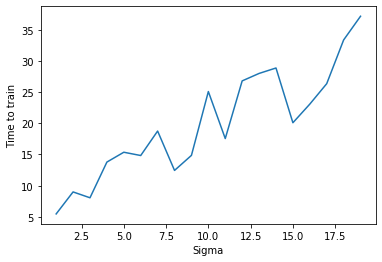

In [21]:
# Standard Hyper Parameters
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": .0001,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

# Generate linear sigma values
sms = np.arange(1,20)

ORBITS_PER = 1
times = []
for s in sms:
    start = time.time()
    train_time = []
    for i in range(ORBITS_PER):
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        rc = ResComp(**params)
        last = time.time()
        first = last
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        train_time.append(time.time()-last)
        """
        last = time.time()
        pred = rc.predict(test_t)
        predict_time.append(time.time()-last)
        last = time.time()
        acc.append(how_long_accurate(u(test_t), pred))
        """
    # Store results
    print(f"Sigma: {s} \t Mean Training Time: {np.mean(train_time)}")
    times.append(np.mean(train_time))
plt.plot(sms,times)
plt.ylabel("Time to train")
plt.xlabel("Sigma")
plt.show()


Repeat with more orbits

In [22]:
# Standard Hyper Parameters
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": .0001,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

# Generate linear sigma values
sms = np.arange(1,20)

ORBITS_PER = 4
times = []
for s in sms:
    start = time.time()
    train_time = []
    for i in range(ORBITS_PER):
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        rc = ResComp(**params)
        last = time.time()
        first = last
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        train_time.append(time.time()-last)
        """
        last = time.time()
        pred = rc.predict(test_t)
        predict_time.append(time.time()-last)
        last = time.time()
        acc.append(how_long_accurate(u(test_t), pred))
        """
    # Store results
    print(f"Sigma: {s} \t Mean Training Time: {np.mean(train_time)}")
    times.append(np.mean(train_time))
plt.plot(sms,times)
plt.ylabel("Time to train")
plt.xlabel("Sigma")
plt.show()


Sigma: 1 	 Mean Training Time: 7.59419173002243
Sigma: 2 	 Mean Training Time: 8.512486577033997
Sigma: 3 	 Mean Training Time: 11.57679170370102
Sigma: 4 	 Mean Training Time: 11.144072949886322
Sigma: 5 	 Mean Training Time: 13.889622688293457
Sigma: 6 	 Mean Training Time: 18.909452855587006
Sigma: 7 	 Mean Training Time: 17.741026639938354
Sigma: 8 	 Mean Training Time: 20.07081538438797
Sigma: 9 	 Mean Training Time: 17.838050305843353
Sigma: 10 	 Mean Training Time: 21.71739912033081
Sigma: 11 	 Mean Training Time: 25.330993175506592
Sigma: 12 	 Mean Training Time: 26.87018257379532
Sigma: 13 	 Mean Training Time: 24.462332546710968
Sigma: 14 	 Mean Training Time: 32.68015342950821
Sigma: 15 	 Mean Training Time: 30.882158935070038


KeyboardInterrupt: 

## Repeat with less regularization and a tighter range

In [3]:
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": 1e-5,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

sms = np.logspace(-2.5,1,14)

ORBITS_PER = 10
timesteps_correct = []
errors = []
for s in sms:
    start = time.time()
    for i in range(ORBITS_PER):
        err = []
        acc = []
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        rc = ResComp(**params)
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        pred = rc.predict(test_t)
        acc.append(how_long_accurate(u(test_t), pred))
    # Store results
    print(f"Sigma: {s} \t Timesteps Correct: {np.mean(acc)} \t Error: {np.mean(err)} \t Time: {time.time()-start}")
    errors.append(np.mean(err))
    timesteps_correct.append(np.mean(acc))

Sigma: 0.0031622776601683794 	 Timesteps Correct: 328.0 	 Error: 0.827121176607933 	 Time: 181.26422810554504
Sigma: 0.0058780160722749115 	 Timesteps Correct: 1025.0 	 Error: 0.19415926863052188 	 Time: 160.16965460777283
Sigma: 0.01092600861117378 	 Timesteps Correct: 1721.0 	 Error: 0.06811914049071732 	 Time: 126.17766332626343
Sigma: 0.020309176209047358 	 Timesteps Correct: 2419.0 	 Error: 0.02504908425341102 	 Time: 128.7905797958374
Sigma: 0.03775053205324393 	 Timesteps Correct: 540.0 	 Error: 0.03061731963901642 	 Time: 131.55502772331238
Sigma: 0.07017038286703826 	 Timesteps Correct: 4970.0 	 Error: 0.026216329367560652 	 Time: 136.13894295692444
Sigma: 0.13043213867190054 	 Timesteps Correct: 842.0 	 Error: 0.0485987525682589 	 Time: 155.3904631137848
Sigma: 0.24244620170823283 	 Timesteps Correct: 308.0 	 Error: 0.10692079058811574 	 Time: 219.31665658950806
Sigma: 0.4506570337745473 	 Timesteps Correct: 22.0 	 Error: 0.5122012431529931 	 Time: 2044.785983324051
Sigma: 0.

KeyboardInterrupt: 

In [ ]:
#I hit a wrong button and ended the last process early, so this is my attempt to resume
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": 1e-5,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

sms = np.logspace(-1,1,5)

ORBITS_PER = 10
timesteps_correct = []
errors = []
for s in sms:
    for i in range(ORBITS_PER):
        err = []
        acc = []
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        rc = ResComp(**params)
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        pred = rc.predict(test_t)
        acc.append(how_long_accurate(u(test_t), pred))
    # Store results
    print(f"Sigma: {s} \t Timesteps Correct: {np.mean(acc)} \t Error: {np.mean(err)}")
    errors.append(np.mean(err))
    timesteps_correct.append(np.mean(acc))

In [ ]:
## Repeat with a different network topology

In [ ]:
params = {
    "uniform_weights": True,
    "solver": "ridge",
    "ridge_alpha": 1e-3,
    "signal_dim": 3,
    "network": "random graph",

    "res_sz": 2000,
    "activ_f": np.tanh,
    "connect_p": .001,
    "spect_rad": .9,
    "gamma": 1.,
    "sigma": 0.12,
    "sparse_res": True,
}

sms = np.logspace(-2.8,1,14)

ORBITS_PER = 10
timesteps_correct = []
errors = []
for s in sms:
    for i in range(ORBITS_PER):
        err = []
        acc = []
        # Solve lorenz equations for a random initial condition
        X0 = random_lorenz_x0()
        train_t, test_t, u = lorenz_equ(X0)
        # Make reservoir computer
        params["sigma"] = s
        A = barab1()
        rc = ResComp(A, **params)
        # Train reservoir computer and predict
        err.append(rc.fit(train_t, u))
        pred = rc.predict(test_t)
        acc.append(how_long_accurate(u(test_t), pred))
    # Store results
    print(f"Sigma: {s} \t Timesteps Correct: {np.mean(acc)} \t Error: {np.mean(err)}")
    errors.append(np.mean(err))
    timesteps_correct.append(np.mean(acc))

In [ ]:
np.logspace(-2.8,1,14)